In [1]:
import networkx as nx
from matplotlib import pyplot, patches
import numpy as np

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

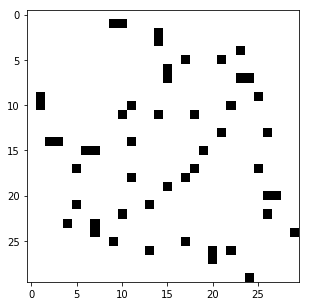

In [2]:
from scipy import io

#A = io.mmread("Caltech.mtx")
#G = nx.from_scipy_sparse_matrix(A)
G = nx.erdos_renyi_graph(30, 0.05)
draw_adjacency_matrix(G)

In [3]:
help

Type help() for interactive help, or help(object) for help about object.

In [4]:
import numpy as np
from collections import defaultdict

"""def assignmentArray_to_lists(assignment_array):
    by_attribute_value = defaultdict(list)
    for node_index, attribute_value in enumerate(assignment_array):
        by_attribute_value[attribute_value].append(node_index)
    return by_attribute_value.values()

# Load in array which maps node index to dorm number
# Convert this to a list of lists indicating dorm membership
dorm_assignment = np.genfromtxt("caltech_dorms_blanksInferred.txt", dtype="u4")
dorm_lists = assignmentArray_to_lists(dorm_assignment)

# Create a list of all nodes sorted by dorm, and plot
# adjacency matrix with this ordering
nodes_dorm_ordered = [node for dorm in dorm_lists for node in dorm]
draw_adjacency_matrix(G, nodes_dorm_ordered, [dorm_lists],["blue"])"""

'def assignmentArray_to_lists(assignment_array):\n    by_attribute_value = defaultdict(list)\n    for node_index, attribute_value in enumerate(assignment_array):\n        by_attribute_value[attribute_value].append(node_index)\n    return by_attribute_value.values()\n\n# Load in array which maps node index to dorm number\n# Convert this to a list of lists indicating dorm membership\ndorm_assignment = np.genfromtxt("caltech_dorms_blanksInferred.txt", dtype="u4")\ndorm_lists = assignmentArray_to_lists(dorm_assignment)\n\n# Create a list of all nodes sorted by dorm, and plot\n# adjacency matrix with this ordering\nnodes_dorm_ordered = [node for dorm in dorm_lists for node in dorm]\ndraw_adjacency_matrix(G, nodes_dorm_ordered, [dorm_lists],["blue"])'

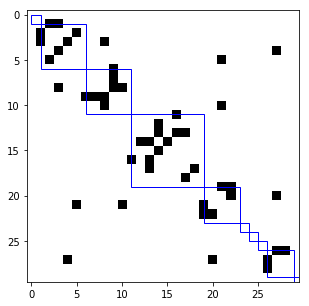

In [5]:
import community

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["blue"])

In [10]:
G